<h1 align = "center"> <u>BOOKS RECOMMENDATION SYSTEM <u/> </h1>

### Importing Libraries

As a first step, let us import the required libraries:

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

### Loading Data
Next, we will read data from a CSV file and display the top 5 rows. We can see that an extra argument has been specified while reading the CSV file - 'on_bad_lines'. A bad line is a line in the csv file with many fields (e.g. a csv line with too many commas). By default, it will cause an exception to be raised, and no DataFrame will be returned. In order to avoid this, we specify to skip such bad lines.

In [2]:
df = pd.read_csv('books.csv', on_bad_lines='skip')
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


### Data Exploration
The dataset contains 12 columns having information about the books, their authors, ratings and other relevant information. Now that we know what our data looks like, let’s go ahead and know more quantitative details about it:

In [3]:
# getting the sum of all null values for each column
df.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [4]:
# describing the quantitative aspect of the dataset
df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


By default, describe() does not give any information on the variables of object data type (categorical variables). To get their summary statistics, let us give the object data type as input to the include argument.

In [5]:
#describing categorical variables of the dataset
df.describe(include = object)

,title,authors,isbn,language_code,publication_date,publisher
count,11123,11123,11123,11123,11123,11123
unique,10348,6639,11123,27,3679,2290
top,The Iliad,Stephen King,0439785960,eng,10/1/2005,Vintage
freq,9,40,1,8908,56,318


We checked the data types of each column and saw that there were no null values present in our data. From the results above, we can infer the following:
- All scores are between 0 and 5. 
- There are total 11123 records.
- The average rating of all books is 3.9.
- Stephen King is the author of most books (40) in the dataset.
- The Illiad has been listed the most (9 times) of all titles.
- The most common language of all listed books is English.

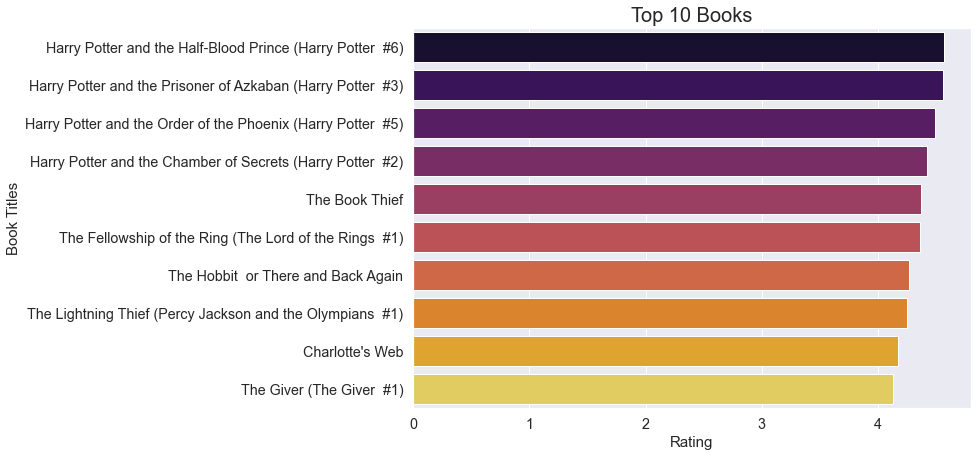

In [6]:
#getting top 10 books by rating
top_ten = df[df['ratings_count'] > 1000000]
top_ten.sort_values(by = 'average_rating', ascending = False)
data = top_ten.sort_values(by = 'average_rating', ascending = False).head(10)

#plotting the data
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10, 7))
sns.set(font_scale = 1.3)
sns.barplot(x = "average_rating", y = "title", data = data, palette = 'inferno')
plt.xlabel("Rating", fontsize = 15)
plt.ylabel("Book Titles", fontsize = 15)
plt.title("Top 10 Books", fontsize = 20)
plt.show()

The results above show us the top 10 books in our data. We saw that the max score in our data was 5.0 but we don’t see any books in the above result with a score of 5.0. Indeed, we have filtered these books according to the number of notes. We’ve made sure that all of the books we have in the above results have a decent rating. There may be books in the data that may have only 1 or 2 notes may be rated 5.0. We want to avoid such books, which is why we used this type of filtering.

Let’s go ahead and take a look at some of the top authors in our data. We’ll rank them according to the number of books they’ve written as long as those books are present in the data:

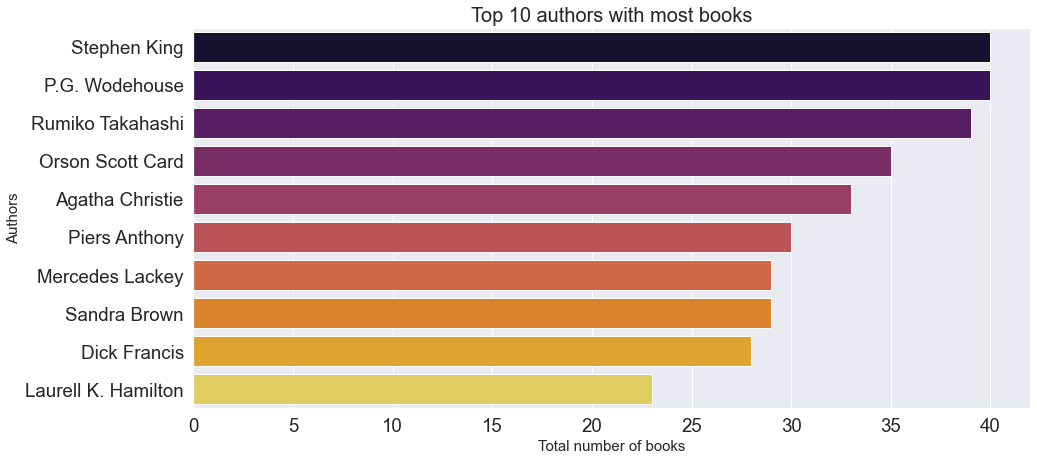

In [7]:
most_books = df.groupby('authors')['title'].count().reset_index().sort_values('title', ascending=False).head(10).set_index('authors')
#print(most_books)

plt.figure(figsize=(15,7))
sns.set(font_scale = 1.7)
sns.barplot(x = most_books['title'], y = most_books.index, palette='inferno')
plt.title("Top 10 authors with most books", fontsize = 20)
plt.xlabel("Total number of books", fontsize = 15)
plt.ylabel("Authors", fontsize = 15)
plt.show()

From the above bar-graph, Stephen King and P.G. Wodehouse have the most books in the data. Both authors have 40 books in our dataset followed by Rumiko Takahashi and Orson Scott Card.

Next, we’ll take a look at which books have been reviewed the most. We have the average rating column in our data and also the number of times a particular book has been rated. We will try to use this column to find the most commented books present in our data:

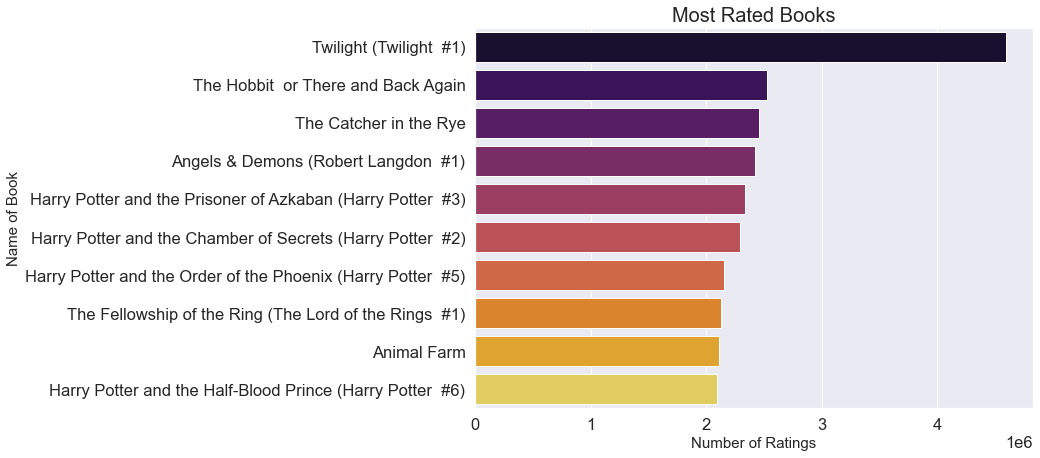

In [8]:
most_rated = df.sort_values('ratings_count', ascending = False).head(10).set_index('title')

plt.figure(figsize=(10,7))
sns.set(font_scale = 1.5)
sns.barplot(x = most_rated['ratings_count'], y = most_rated.index, palette = 'inferno')
plt.title('Most Rated Books', fontsize = 20)
plt.xlabel('Number of Ratings', fontsize = 15)
plt.ylabel('Name of Book', fontsize = 15)
plt.show()

We can see that 'Twilight' has been rated more times than any other book! Also, these ratings are all in the millions! So that means Twilight has been reviewed over 4 million times, followed by 'The Hobbit' or 'There and Back Again' and then 'The Catcher in the Rye' which has been reviewed over 2 million times.

Let’s try to find a relation between our average score and the number of scores. We are doing this to see how we can use these columns in our recommendation. We will also check the distribution of average scores with the number of pages in a book, the language used in the book and the number of text reviews:

Text(0.5, 15.440000000000012, 'Average Rating')

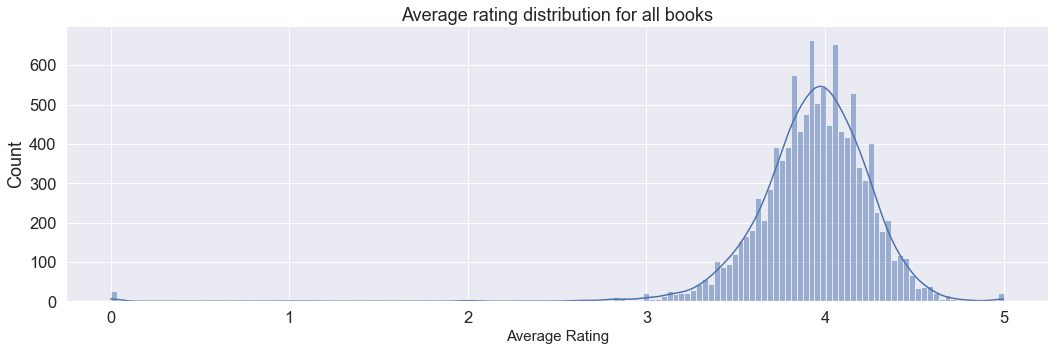

In [9]:
df.average_rating = df.average_rating.astype(float)

#sns.distplot(df['average_rating'],ax = ax)
sns.displot(data = df, x = 'average_rating', kde = True, height = 5, aspect = 3)
plt.title('Average rating distribution for all books',fontsize = 18)
plt.xlabel('Average Rating',fontsize=15)

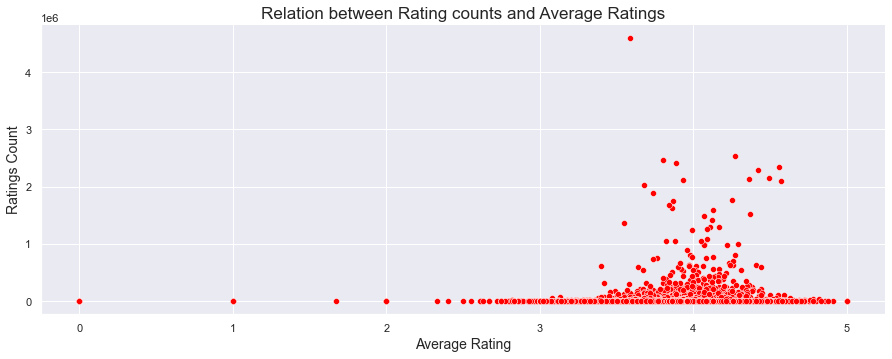

In [10]:
sns.set(font_scale = 1)
sns.relplot(data=df, x="average_rating", y="ratings_count", color = 'red', height = 5, aspect = 2.5, marker='o')
plt.title("Relation between Rating counts and Average Ratings", fontsize = 17)
plt.xlabel("Average Rating", fontsize = 14)
plt.ylabel("Ratings Count", fontsize = 14)
plt.show()

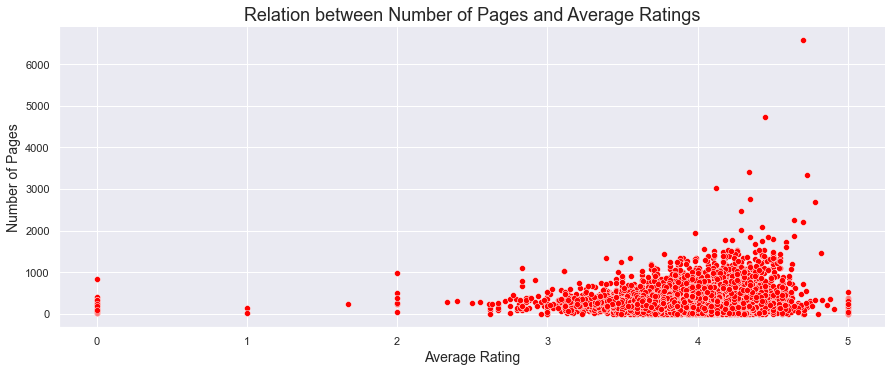

In [11]:
sns.set(font_scale = 1)
sns.relplot(x="average_rating", y="  num_pages", data = df, color = 'red', height = 5, aspect = 2.5, marker='o')
plt.title("Relation between Number of Pages and Average Ratings", fontsize = 18)
plt.xlabel("Average Rating", fontsize = 14)
plt.ylabel("Number of Pages", fontsize = 14)
plt.show()

After comparing the average rating with the different columns, we can continue to use the language and number of ratings for our recommendation system. The other columns don't help us to a great extent so we can omit them.

We will make a copy of our original data just to be safe in case we mess anything up:

In [12]:
df2 = df.copy()

### Data Preparation
We are now going to create a new column called ‘rating_between’. We will divide our average rating column into different categories such as rating between 0 and 1, 1 and 2, etc. This will work as one of the features that we will build into our model so that it can make better predictions:

In [13]:
df2.loc[ (df2['average_rating'] >= 0) & (df2['average_rating'] <= 1), 'rating_between'] = "between 0 and 1"
df2.loc[ (df2['average_rating'] > 1) & (df2['average_rating'] <= 2), 'rating_between'] = "between 1 and 2"
df2.loc[ (df2['average_rating'] > 2) & (df2['average_rating'] <= 3), 'rating_between'] = "between 2 and 3"
df2.loc[ (df2['average_rating'] > 3) & (df2['average_rating'] <= 4), 'rating_between'] = "between 3 and 4"
df2.loc[ (df2['average_rating'] > 4) & (df2['average_rating'] <= 5), 'rating_between'] = "between 4 and 5"

We will now perform one-hot encoding for Rating and Language.

In [14]:
rating_df = pd.get_dummies(df2['rating_between'])
language_df = pd.get_dummies(df2['language_code'])

We are now going to concatenate these two data frames into one and name it as features. This DataFrame will be the functionality that we provide to the Book Recommendation System with Machine Learning. It will contain the values of rating_df and language_df and will also have the values of average grade and number of grades:

In [15]:
features = pd.concat([rating_df, 
                      language_df, 
                      df2['average_rating'], 
                      df2['ratings_count']], axis=1)

### Book Recommendation System: Final Step
Now that our features are ready, we will use the Min-Max scaler to reduce these values. This will help reduce the bias for some of the books that may have too many features. The algorithm will find the median for all and equalize it:

In [16]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
features = min_max_scaler.fit_transform(features)

We have reduced the features and we now can use the KNN algorithm to build our Book Recommendation system with Machine Learning using Python:

In [17]:
model = neighbors.NearestNeighbors(n_neighbors=6, algorithm='ball_tree')
model.fit(features)
dist, idlist = model.kneighbors(features)

Now that our model is ready, let's write a function that will take a book name as input and return books based on the similar features.

In [18]:
def BookRecommender(book_name):
    book_list_name = []
    book_id = df2[df2['title'] == book_name].index
    book_id = book_id[0]
    for newid in idlist[book_id]:
        book_list_name.append(df2.loc[newid].title)
    return book_list_name

Our python function is written. Let us input 'Harry Potter and the Half-Blood Prince (Harry Potter  #6)' and see the result:

In [19]:
BookNames = BookRecommender('Harry Potter and the Half-Blood Prince (Harry Potter  #6)')
BookNames

['Harry Potter and the Half-Blood Prince (Harry Potter  #6)',
 'Harry Potter and the Order of the Phoenix (Harry Potter  #5)',
 'The Fellowship of the Ring (The Lord of the Rings  #1)',
 'Harry Potter and the Chamber of Secrets (Harry Potter  #2)',
 'Harry Potter and the Prisoner of Azkaban (Harry Potter  #3)',
 'The Lightning Thief (Percy Jackson and the Olympians  #1)']

With this, we come to the end of a machine learning project on the book recommendation system. As we can see, our model shows a pretty decent result.

<h4 align="center"> Created by Aayushi Gupta on 27th January 2023 </h4>